In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# df_unlabel = pd.read_csv("unlabeledTrainData.tsv",sep='\t')
# df_unlabel.head()

In [3]:
df = pd.read_csv("labeledTrainData.tsv" , sep='\t')
df

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...


In [4]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

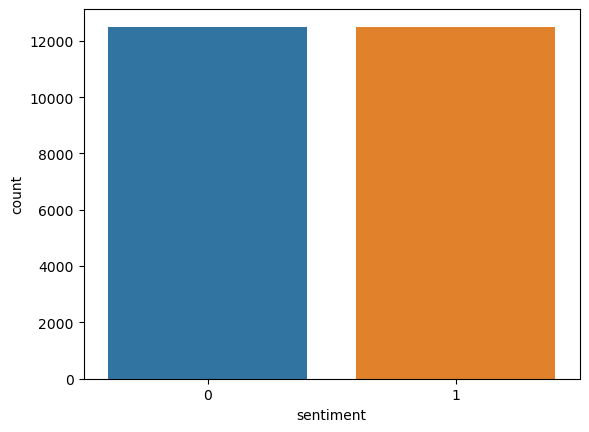

In [5]:
sns.countplot(x='sentiment',data=df)
plt.show()

In [6]:
df.isnull().sum()

id           0
sentiment    0
review       0
dtype: int64

In [7]:
count = df.sentiment.apply(lambda x: x==1).sum()

In [8]:
count

12500

In [9]:
stemmer = PorterStemmer()

In [10]:
def stemming(content):
  stemming_content = re.sub("[^a-zA-Z]",' ',content)
  stemming_content = stemming_content.lower()
  stemming_content = stemming_content.split()
  stemming_content = [stemmer.stem(word) for word in stemming_content if not word in stopwords.words('english')]
  stemming_content = ' '.join(stemming_content)
  return stemming_content




In [11]:
df1 = df.copy()


In [12]:
df1.review = df.review.apply(stemming)

In [13]:
x = df1.review
y =df1.sentiment

In [14]:
vect = TfidfVectorizer()
vect.fit(x)

x = vect.transform(x)

In [15]:
from xgboost import XGBClassifier

model  = XGBClassifier(
  n_estimators=1000,
  max_depth=5,
  learning_rate=0.1,
  objective='binary:logistic',
  nthread=4

)

model.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

In [16]:
df_test = pd.read_csv("testData.tsv",sep = '\t')
df_test

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...
...,...,...
24995,2155_10,"Sony Pictures Classics, I'm looking at you! So..."
24996,59_10,I always felt that Ms. Merkerson had never got...
24997,2531_1,I was so disappointed in this movie. I am very...
24998,7772_8,"From the opening sequence, filled with black a..."


In [17]:
df.review = df.review.apply(stemming)
x_test = df_test.review
x_test = vect.fit_transform(x_test)

In [18]:
pred = model.predict(x_test)
pred

ValueError: Feature shape mismatch, expected: 49642, got 73822

In [ ]:
df_check = pd.read_csv("sampleSubmission.csv",sep='\t')
df_check

In [ ]:
score = accuracy_score(pred,df_check.sentiment)